In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#Parameters
kB = 1.38e-23 
m = 1.11e-14      #kg
R = 1*1e-6          #m
theta = 0.001       #Ns-1
gamma = 6*np.pi*theta*R     #coeffiecient
T = 300             #K
tau = m/gamma
num_trajectories = 1000

In [38]:
def InertialViscousTrajectories(dt,num_steps,N):
    num_traj = N
    x_w_mass = np.zeros((num_traj,num_steps))
    x_wo_mass = np.zeros((num_traj,num_steps))
    time = np.linspace(0, num_steps*dt, num = num_steps)

    for traj in range(num_traj):
        for t in range(2,num_steps):
            w = np.random.randn()
            
            #the Langevin equation with mass
            z = 1+dt*(gamma/m)
            x_w_mass[traj,t]=(2+dt*gamma/m)/z*x_w_mass[traj,t-1] - x_w_mass[traj,t-2]/z + np.sqrt(2*kB*T*gamma)*dt**(3/2)*w/(m*z)   #eq5.6

            #the Langevin equation without mass
            x_wo_mass[traj,t] = x_wo_mass[traj,t-1] + np.sqrt(2*kB*T*dt/gamma)*w      #eq5.7
    
    return x_w_mass, x_wo_mass, time


In [39]:
def calculate_MSD(positions):
     
    num_traj = len(positions)
    num_steps = len(positions[0])
    msd = np.zeros((num_traj,num_steps))
    '''
    for t in range(1, N):
        dist_sqaur = (positions[:,t:] - positions[:,:-t])**2
        emsd[:,t] = dist_sqaur
    emsd = np.mean(emsd,axis=0)'''
    
    for t in range(1, num_steps):
        msd[:,t] = np.mean((positions[:,t:] - positions[:,:-t])**2)
    msd = np.mean(msd,axis=0)

    
    
    return msd

Text(0.5, 1.0, 'The trajectories for a tau duration')

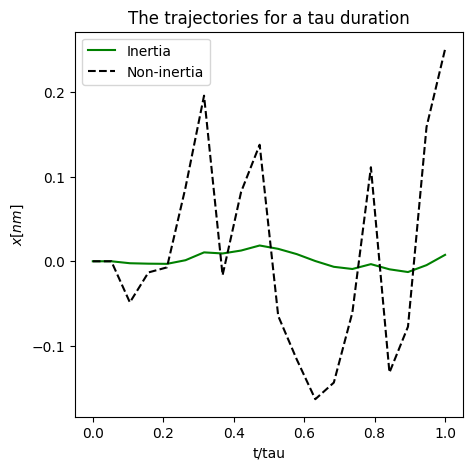

In [84]:
#5.3 a
dt = 0.05*tau
num_steps = int(tau/dt)     #1 Tau
position_w_mass_1, position_wo_mass_1, time_1 = InertialViscousTrajectories(dt,num_steps,num_trajectories)    

#Plot
plt.figure(figsize=(5,5))
plt.plot(time_1/tau, position_w_mass_1[:1,:].T*1e9, linestyle = "-", color = "g")           #with mass
plt.plot(time_1/tau,position_wo_mass_1[:1,:].T*1e9, linestyle = "--", color = "black")      #without mass
plt.xlabel('t/tau')
plt.ylabel('$x[nm]$')
plt.legend(["Inertia","Non-inertia"])
plt.title("The trajectories for a tau duration")

Text(0.5, 1.0, 'The trajectories for 100 tau duration')

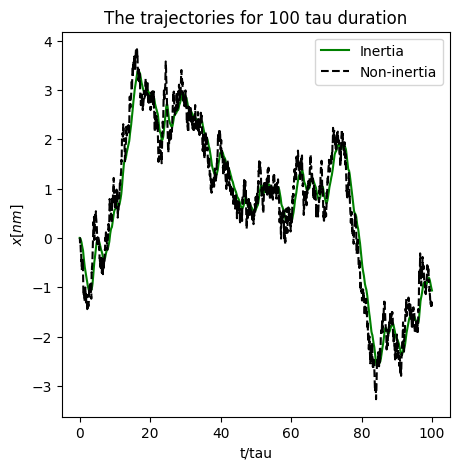

In [85]:
dt = 0.05*tau
num_steps = int(100*tau/dt)     #100 Tau
position_w_mass_100, position_wo_mass_100, time_100 = InertialViscousTrajectories(dt,num_steps,num_trajectories)    

#Plot
plt.figure(figsize=(5,5))

plt.plot(time_100/tau, position_w_mass_100[:1,:].T*1e9, linestyle = "-", color = "g")       #with mass
plt.plot(time_100/tau,position_wo_mass_100[:1,:].T*1e9, linestyle = "--", color = "black")  #without mass
plt.xlabel('t/tau')
plt.ylabel('$x[nm]$')
plt.legend(["Inertia","Non-inertia"])
plt.title("The trajectories for 100 tau duration")

In [88]:
#5.3 b calculate MSDs
msd_w_mass_100 = np.zeros((len(position_w_mass_100),num_steps - 1))
msd_wo_mass_100 = np.zeros((len(position_wo_mass_100),num_steps - 1))

msd_w_mass_100 = calculate_MSD(position_w_mass_100)
msd_wo_mass_100 = calculate_MSD(position_wo_mass_100)

msd_w_mass_1 = np.zeros((len(position_w_mass_1),num_steps - 1))
msd_wo_mass_1 = np.zeros((len(position_wo_mass_1),num_steps - 1))

msd_w_mass_1 = calculate_MSD(position_w_mass_1)
msd_wo_mass_1 = calculate_MSD(position_wo_mass_1)

'''
for i in range(0, num_steps):
    plt.scatter(i*dt, np.mean(np.square(position_wo_mass[:, int(i)])),color ='black')
    plt.scatter(i*dt, np.mean(np.square(position_w_mass[:, int(i)])),color = 'g')'''

"\nfor i in range(0, num_steps):\n    plt.scatter(i*dt, np.mean(np.square(position_wo_mass[:, int(i)])),color ='black')\n    plt.scatter(i*dt, np.mean(np.square(position_w_mass[:, int(i)])),color = 'g')"

Text(0.5, 1.0, 'The MSDs of Lagevin equation with mass and without mass for 100 tau duration')

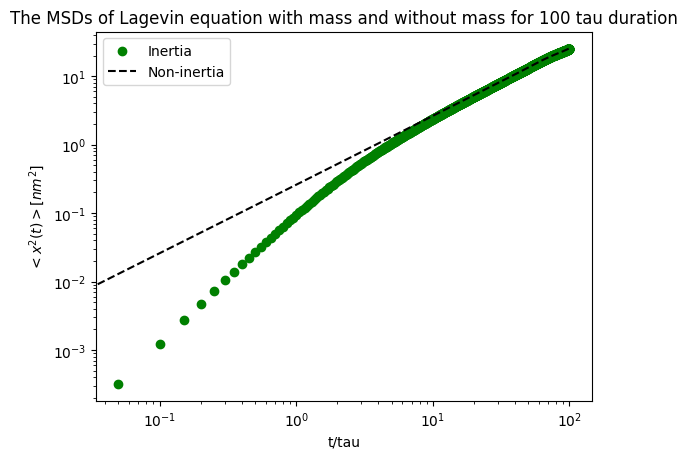

In [89]:
#Plot
plt.scatter(time_100/tau, msd_w_mass_100.T*1e18, marker = "o", color = "g")           #with mass
plt.plot(time_100/tau,msd_wo_mass_100.T*1e18, linestyle = "--", color = "black")      #without mass  
plt.xscale("log")
plt.yscale("log")
plt.legend(["Inertia","Non-inertia"])
plt.xlabel("t/tau")
plt.ylabel("$<x^2(t)> [nm^2]$")
plt.title('The MSDs of Lagevin equation with mass and without mass for 100 tau duration')

Text(0.5, 1.0, 'The MSDs of Lagevin equation with mass and without mass for 1 tau duration')

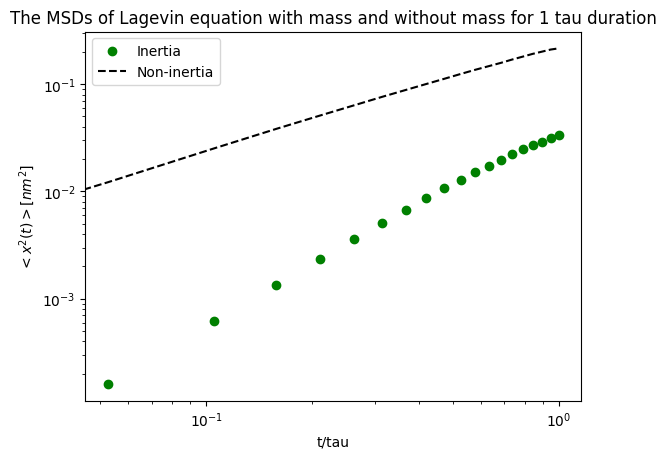

In [90]:
plt.scatter(time_1/tau, msd_w_mass_1.T*1e18, marker = "o", color = "g")           #with mass
plt.plot(time_1/tau,msd_wo_mass_1.T*1e18, linestyle = "--", color = "black")      #without mass  
plt.xscale("log")
plt.yscale("log")
plt.legend(["Inertia","Non-inertia"])
plt.xlabel("t/tau")
plt.ylabel("$<x^2(t)> [nm^2]$")
plt.title('The MSDs of Lagevin equation with mass and without mass for 1 tau duration')

Text(0, 0.5, '$<x^2(t)> [nm^2]$')

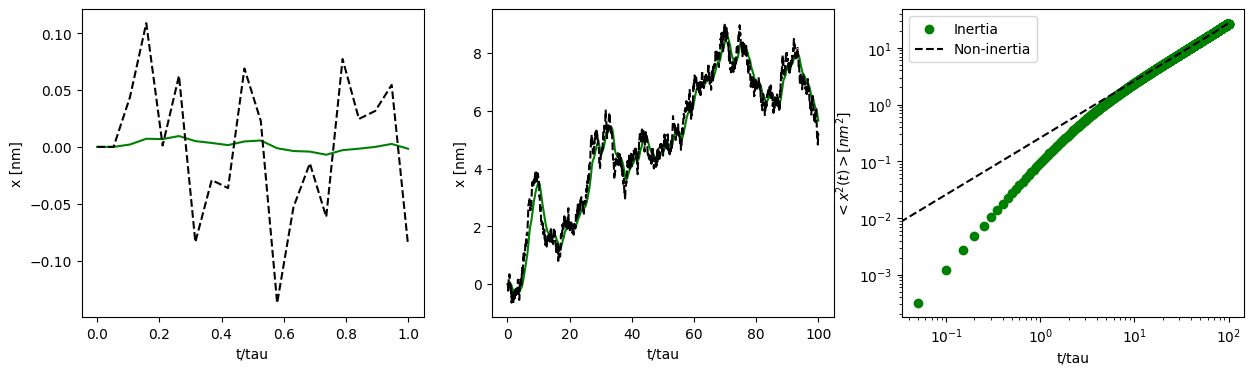

In [44]:
#plot
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(time_1/tau, position_w_mass_1[:1,:].T*1e9, linestyle = "-", color = "g")           #with mass
plt.plot(time_1/tau,position_wo_mass_1[:1,:].T*1e9, linestyle = "--", color = "black")      #without mass
plt.xlabel("t/tau")
plt.ylabel("x [nm]")

plt.subplot(1,3,2)
plt.plot(time_100/tau, position_w_mass_100[:1,:].T*1e9, linestyle = "-", color = "g")       #with mass
plt.plot(time_100/tau,position_wo_mass_100[:1,:].T*1e9, linestyle = "--", color = "black")  #without mass
plt.xlabel("t/tau")
plt.ylabel("x [nm]")

plt.subplot(1,3,3)
plt.scatter(time_100/tau, msd_w_mass_100.T*1e18, marker = "o", color = "g")           #with mass
plt.plot(time_100/tau,msd_wo_mass_100.T*1e18, linestyle = "--", color = "black")      #without mass  
plt.xscale("log")
plt.yscale("log")
plt.legend(["Inertia","Non-inertia"])
plt.xlabel("t/tau")
plt.ylabel("$<x^2(t)> [nm^2]$")

In [45]:
#5.3 c compute tMSDs and eMSDs
def calculate_eMSD(positions):
    num_traj = len(positions)
    num_steps = len(positions[0])
    emsd = np.zeros((num_traj,num_steps))
    
    for t in range(1, num_steps):
        emsd[:,t] = np.mean((positions[:,t:] - positions[:,:-t])**2)

    #average over trajectories    
    emsd = np.mean(emsd,axis=0)
    
    return emsd



In [46]:
def calculate_tMSD(positions):
    num_traj = len(positions)
    num_steps = len(positions[0])
    tmsd = np.zeros((num_traj,num_steps))

    for tau in range(1,num_steps):
        for i in range(num_steps-tau):
            tmsd[:,tau] += (positions[:,i+tau] - positions[:,i])**2
        tmsd[:,tau] /= (num_steps-tau)

    #average over trajectories
    tmsd = np.mean(tmsd, axis=0)

    return tmsd

In [47]:
num_trajectories = 1000
dt = 0.05*tau
num_steps = int(100*tau/dt)
single_w_mass_100, single_wo_mass_100, singe_time  = InertialViscousTrajectories(dt,num_steps,num_trajectories)

In [48]:
#Calculate MSDs
tmsd_position_w_m = calculate_tMSD(single_w_mass_100)
emsd_position_w_m = calculate_eMSD(single_w_mass_100)
tmsd_position_wo_m = calculate_tMSD(single_wo_mass_100)
emsd_position_wo_m = calculate_eMSD(single_wo_mass_100)

Text(0.5, 1.0, 'Langevin equation without mass')

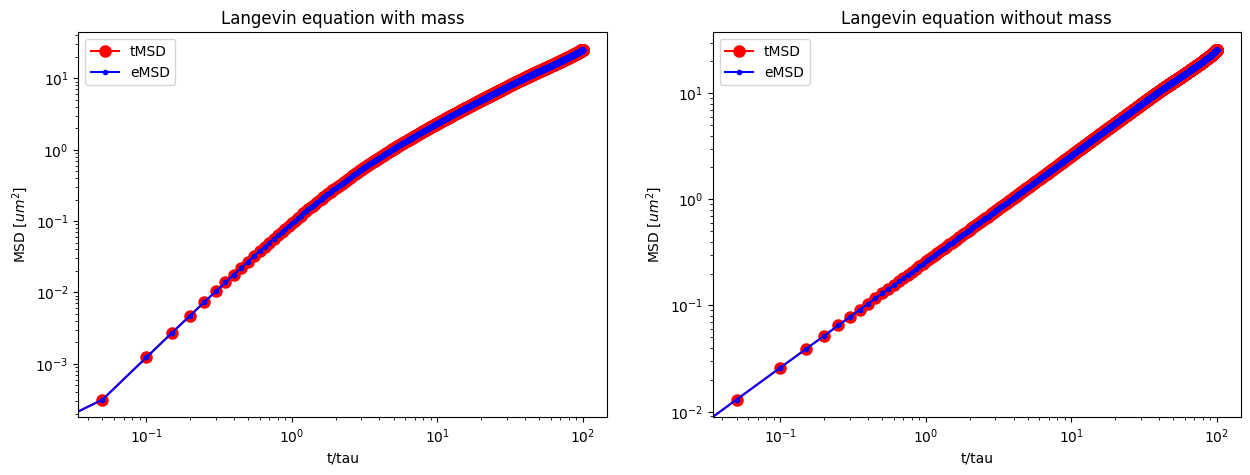

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(singe_time/tau,tmsd_position_w_m.T*1e18,marker ='o',color='r',markersize =8)
plt.plot(singe_time/tau,emsd_position_w_m.T*1e18,marker = 'o',color='b',markersize =3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("t/tau")
plt.ylabel("MSD $[um^2]$")
plt.legend(["tMSD","eMSD"])
plt.title("Langevin equation with mass")

plt.subplot(1,2,2)
plt.plot(singe_time/tau,tmsd_position_wo_m.T*1e18,marker ='o',color='r',markersize =8)
plt.plot(singe_time/tau,emsd_position_wo_m.T*1e18,marker = 'o',color='b',markersize =3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("t/tau")
plt.ylabel("MSD $[um^2]$")
plt.legend(["tMSD","eMSD"])
plt.title("Langevin equation without mass")